# The Perils of p-value

## Executive summary
All statistical tests consist of deciding whether or not to reject a null hypothesis. The decision hinges on a single number which is the probability of committing a type-I error also called the $p$-value. This article points out the danger of deciding a hypothesis by reading the $p$-value from a statistical test on a single sample.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

np.random.seed(15081947)

## An example
Let us consider a synthetic data set which has $30$ numbers. 

In [14]:
dataset_1 = np.random.binomial(n=100, p=0.1, size=30)
dataset_2 = np.random.binomial(n=100, p=0.08, size=30)

Each one is a set of $30$ binomially distributed random variables. An individual random variable is the number of 'successes' in $100$ coin-tosses where the probability of success is $0.1$ in the first data set and $0.08$ in the second one. We can consider these data sets as the number of defective items found in $30$ samples of $100$ items each. The 'success' in this case is in finding a defective item. 

From the choice of $p$ we expect that the second data set will have fewer defective items than the first one. Let us compare the five-point summary of the two datasets.

In [18]:
D = pd.DataFrame({'d1': dataset_1, 'd2': dataset_2})

In [20]:
D.describe()

,d1,d2
count,30.000000,30.000000
mean,11.166667,7.766667
std,3.895916,2.445028
min,4.000000,2.000000
25%,8.250000,7.000000
50%,11.000000,8.000000
75%,14.000000,9.000000
max,18.000000,12.000000


The summary is on the expected lines. We do expect the mean number of defective items in the second dataset to be smaller than that in the first one. We also expect that the maximum number of defects found in the first data set will be greater than that found in the second one. If we do a two-sample $t$-test on these samples we expect it to give a decisive result that the two samples come from different distributions.

In [21]:
results = stats.ttest_ind(dataset_1, dataset_2, equal_var=False)

In [22]:
print(f'The p-value of the test is {results[1]}.')

The p-value of the test is 0.0001836423817491004.


Recall that the null hypothesis of the two-sample $t$-test is that the two samples have the same mean. The $p$-value obtained above suggests that that we can reject the null-hypothesis and conclude that the the two sample have different means. No surprise here. We had created the two data sets with different means.

## Repetitions of the experiment

Now suppose that we repeat this experiment a large number of times, say $1000$ times. Each time we draw a sample from the binomial distributions with $100$ trials each and $p=0.1$ and $p=0.08$. We run a two sample $t$-test on them and save the $p$-value. We will check what kind of $p$-values we get in our experiment.

In [24]:
def sample_and_test():
    d1 = np.random.binomial(n=100, p=0.1, size=30)
    d2 = np.random.binomial(n=100, p=0.08, size=30)
    
    results = stats.ttest_ind(d1, d2)
    return results[1]

n_experiments = 1000
p_values = [0] * n_experiments

for i in range(n_experiments):
    p_values[i] = sample_and_test()
    
print('Five point summary of p-values:')
print(f'Minimum: {np.min(p_values)}.')
print(f'Maximum: {np.max(p_values)}.')
print(f'Mean:    {np.mean(p_values)}.')
print(f'Median:  {np.mean(p_values)}.')
print(f'Stdev:   {np.std(p_values)}.')


Five point summary of p-values:
Minimum: 6.677355148482334e-09.
Maximum: 0.9675244174174178.
Mean:    0.048117409089415246.
Median:  0.048117409089415246.
Stdev:   0.10565056795483306.


It is quite surprising to observe that the maximum $p$-value was close to $1$. Let us plot a histogram of these $p$-values to find out the nature of their distribution.

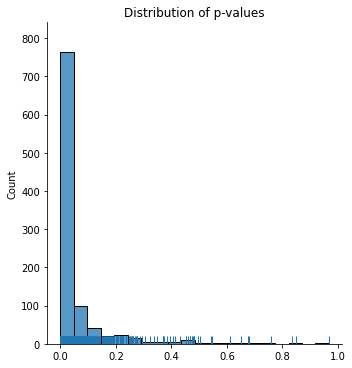

In [26]:
sns.displot(p_values, kind='hist', bins = 20, rug=True)
ignore = plt.title('Distribution of p-values')

It is not uncommon to get $p$-values greater than the customary $0.05$ used to decide a hypothesis.

In [28]:
high = sum([p > 0.05 for p in p_values])
print(f'Number of p-values greater than 0.05 = {high} out of {n_experiments}.')

Number of p-values greater than 0.05 = 227 out of 1000.


For a whopping $22\%$ of the trials the $t$-test on a pair of samples drawn from two different binomial distributions resulted in a $p$-value greater than $0.05$.

## How should we use p-values?

Statistical tests have relied on $p$-values for decades although statisticians were always aware that getting a certain $p$-value was always a matter of chance. Several statisticians had also cautioned on the tendancy of some practioners to select a sample that gives a $p$-value convenient to them. Infering based a single $p$-value is relying on luck. But we can take advantage of the distribution of $p$-values shown in the histogram above to make $p$-value analysis useful. Instead of relying on a single sample to come to a conclusion, one must run a statistical test on a large number of samples. If most of them result in a $p$-value smaller than a threshold then we should reject the null hypothesis. Otherwise, one should not reject it.

## Additional References

1. The statistician Nassim Nicholas Taleb has been a vocal critique of several dangerous practices in data analysis. He explains the subject matter of this article in greater depths in a [YouTube video](https://www.youtube.com/watch?v=8qrfSh07rT0) and a [research paper](https://arxiv.org/pdf/1603.07532).

2. Another [YouTube video](https://www.youtube.com/watch?v=UFhJefdVCjE) explaining the point in greater details, but with great lucidity.